In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import data_io
from typing import List
CURRENT_WORKING_DIR = os.getcwd()

In [2]:
data_dir: str = os.path.join(CURRENT_WORKING_DIR, 'data', 'archive')
file_names: str = data_io.get_file_names(data_dir)
game_frames: dict = {name[:-4]: pd.read_csv(f'{data_dir}/{name}', dtype=float) for name in file_names}

In [3]:
def plot_gameplay(title: str, game_frame: pd.DataFrame, plot_eight_hour_lines=False) -> None:
    sns.set_palette(sns.color_palette('husl', 4))
    sns.set_context('talk')
    x: pd.Series = frame['round']
    y: pd.DataFrame = frame.drop('round', axis=1)
    plt.figure(figsize=(20, 10))
    lines = plt.plot(x, y, linewidth=3.5)
    hour_params: dict = {'color': sns.xkcd_rgb['amber'], 'alpha': .45}
    if plot_eight_hour_lines:
        game_round: int = 480
        while game_round <= game_frame.shape[0]:
            plt.axvline(x=game_round, dashes=[6, 2], **hour_params, linewidth=1)
            game_round += 480
        plt.text(500, 1020, 'eight hours', fontsize=15, **hour_params)
    plt.xlabel('rounds')
    plt.ylabel('bankroll $')
    plt.legend(lines, list(y))
    plt.title(title)

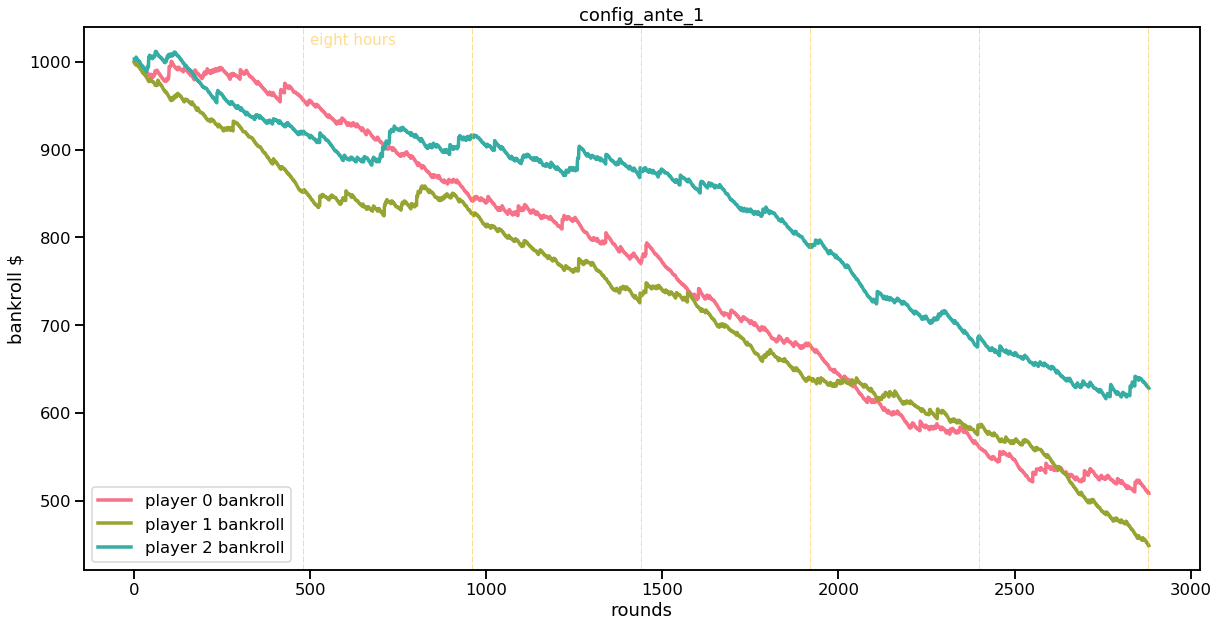

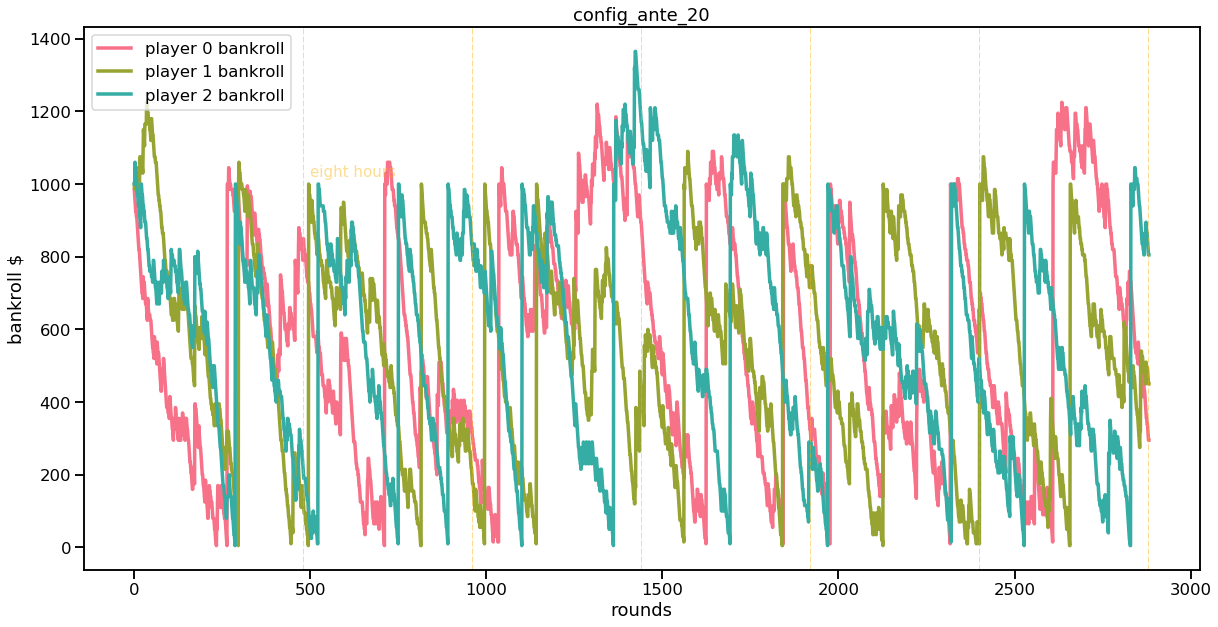

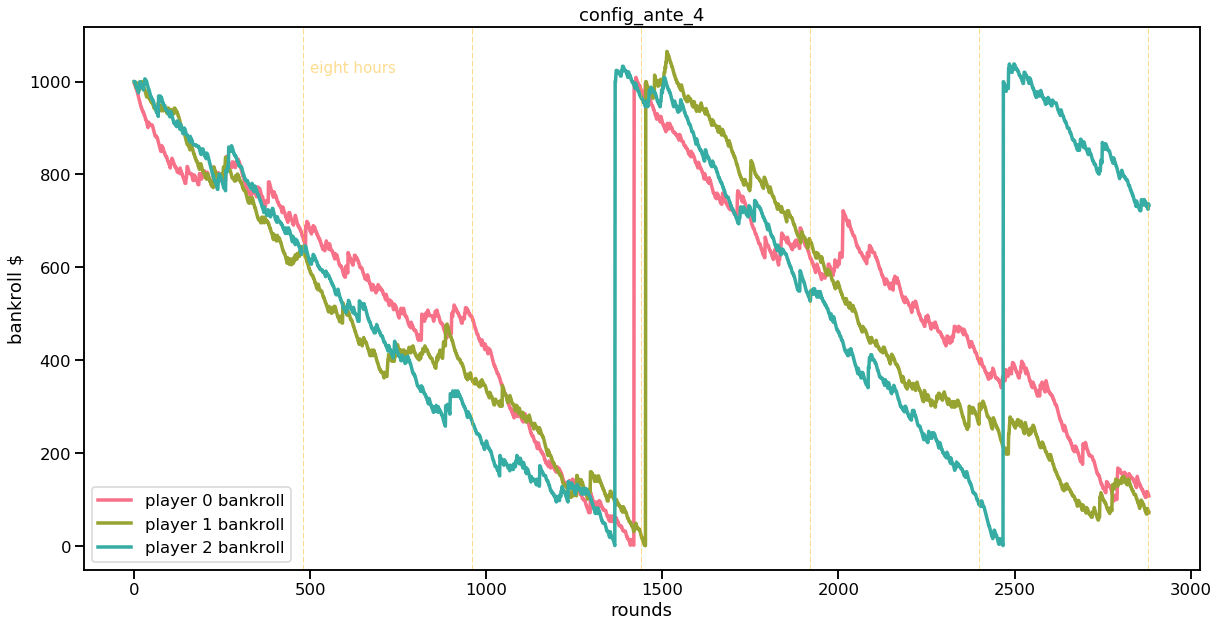

In [4]:
for name, frame in game_frames.items():
    plot_gameplay(name, frame, plot_eight_hour_lines=True)

In [5]:
data_dir: str = os.path.join(CURRENT_WORKING_DIR, 'data')
file_names: str = data_io.get_file_names(data_dir)
one_hour_one_player_games: dict = {name[:-4]: pd.read_csv(f'{data_dir}/{name}', dtype=float) for name in file_names}

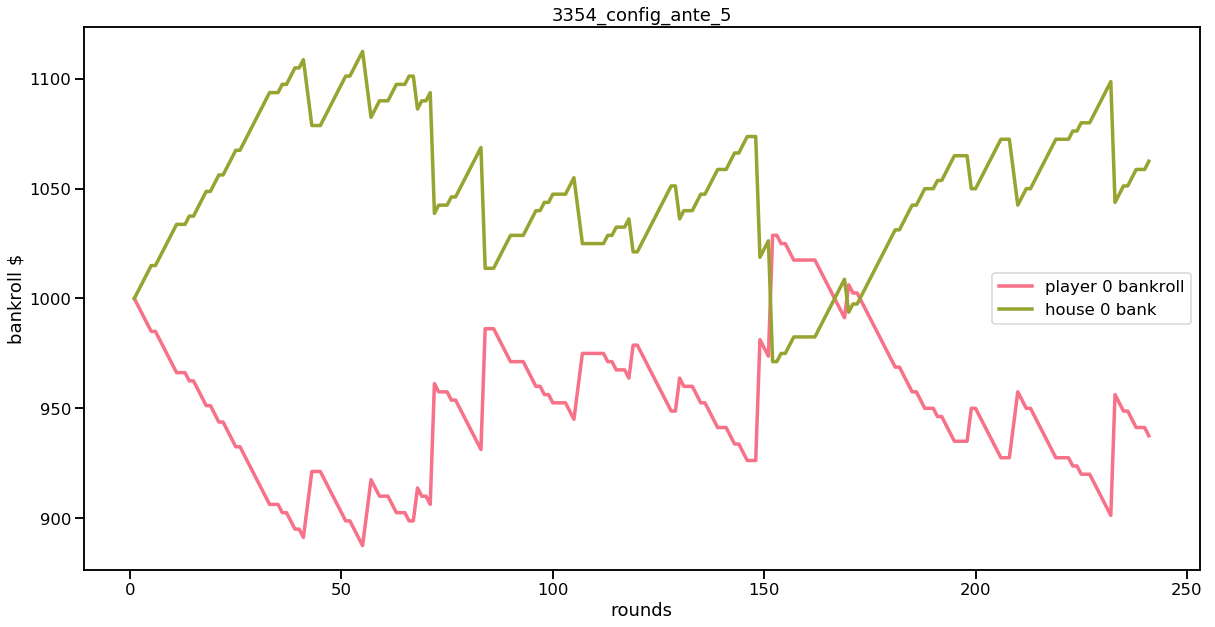

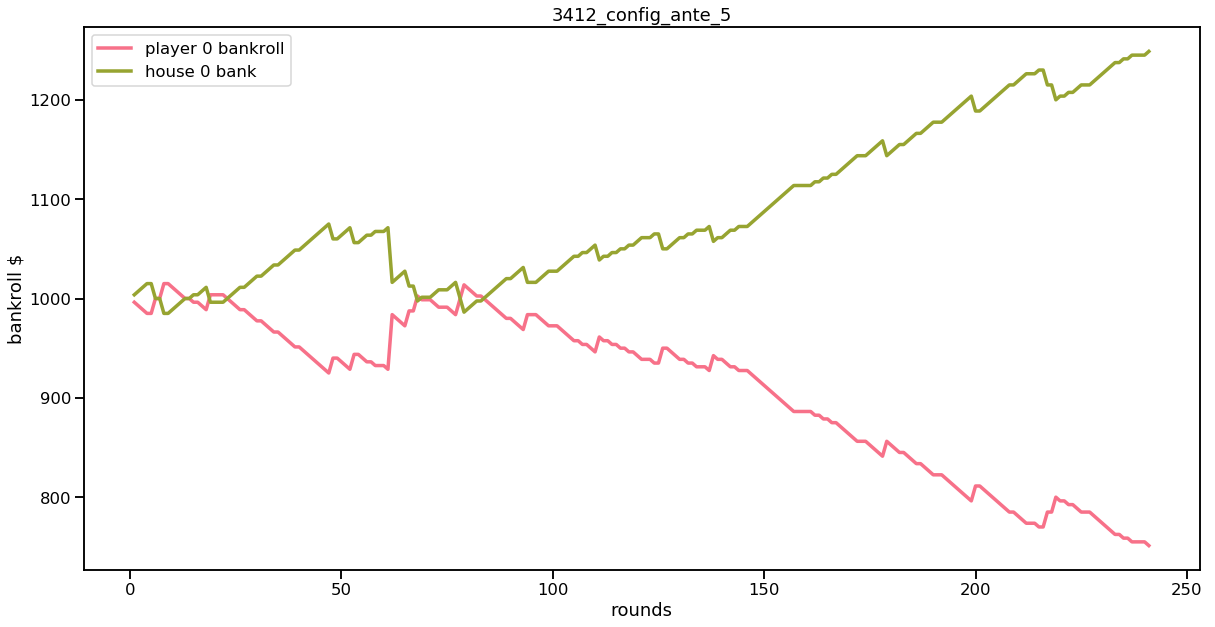

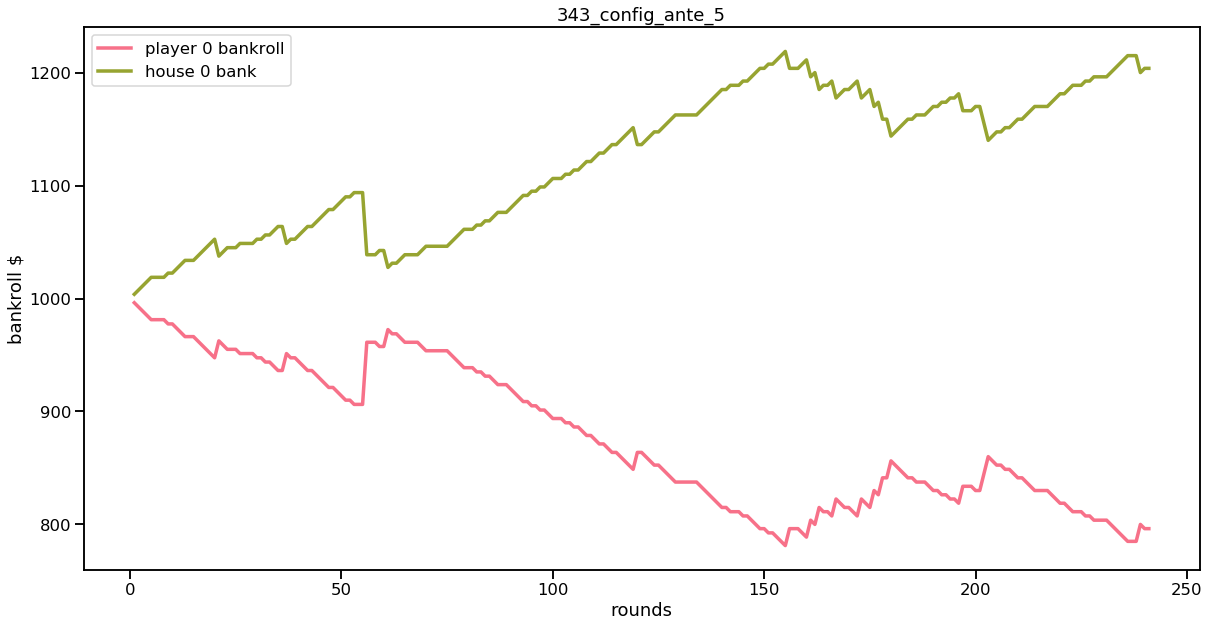

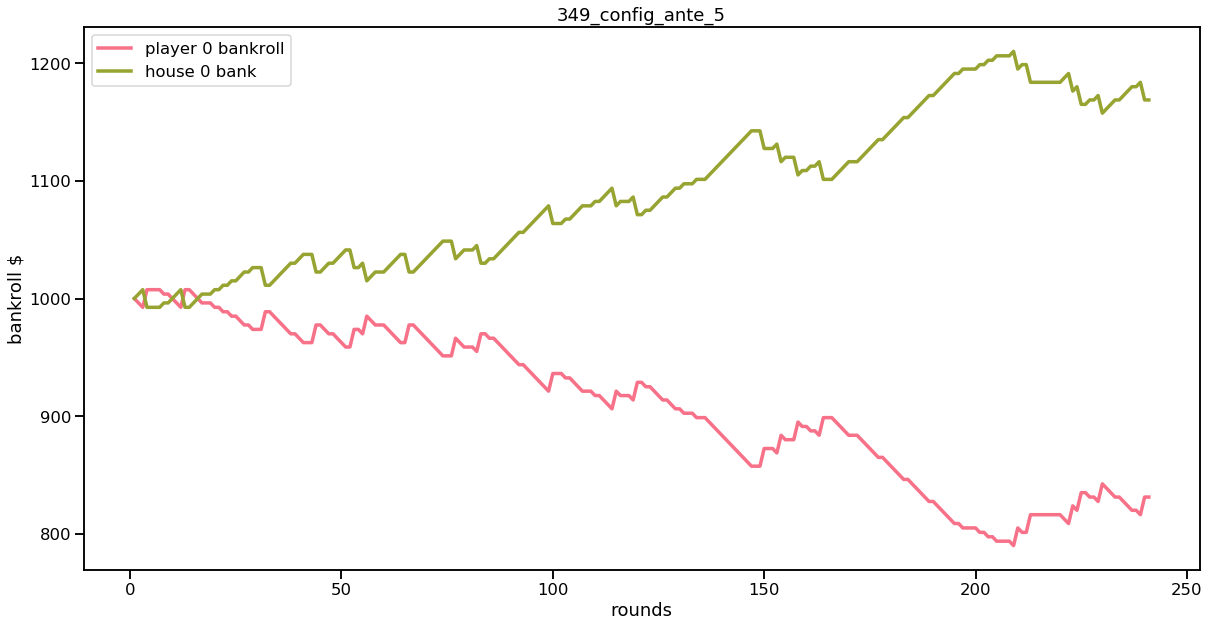

In [6]:
for name, frame in one_hour_one_player_games.items():
    plot_gameplay(name, frame, plot_eight_hour_lines=False)